<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework_Earth's_Orbit_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Orbit of the Earth

Use the Verlet method to calculate the orbit of the Earth around
the Sun.  If the Earth and sun are considered to be in a single plane, then the equations of motion of the Earth can be written as:

$\frac{d^2x}{dt^2} = - G M \frac{x}{r^3} \qquad\frac{d^2y}{dt^2} = - G M \frac{y}{r^3} $ 

where $r = \sqrt{x^2+y^2}$, $G=6.6738\times10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ is Newton's gravitational constant and $M=1.9891\times10^{30}\,$kg is the mass of the Sun.

The orbit of the Earth is not perfectly circular, the planet being
sometimes closer to and sometimes further from the Sun.  When it is at its
closest point, or *perihelion*, it is moving precisely tangentially
(i.e., perpendicular to the line between itself and the Sun) and it has
distance $1.4710\times10^{11}\,$m from the Sun and linear velocity
$3.0287\times10^4\,\mathrm{m\,s^{-1}}$.  If you setup your system so that the sun is at the origin, this corresponds to the following  conditions:

$x(0) = 0 m \qquad y(0)=1.4710\times10^{11} m \qquad v_x(0) = 3.0287\times10^4\,\mathrm{m\,s^{-1}} \qquad v_y(0)= 0 \mathrm{m\,s^{-1}} $

#A.

Write a program to calculate the orbit of the Earth using the velocity Verlet
  method with a time-step of $h=1$ hour.  Make a
  plot of the orbit, showing several complete revolutions about the Sun.
  The orbit should be very slightly, but visibly, non-circular. 
  
  Hint: to make this program, you will need to modify our velocity Verlet algorithm from class so that it works in two dimensions.  This will require modifying not only the acceleration routine, bue also the arrays that store positions and velocities.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep.  Be sure to convert all time units to seconds to keep SI units.


In [ ]:
start =  0.0
end   =  60*60*24*365*5 #5 years, converted to seconds
r_0   =  np.array([0.0,1.471e11]) #m, initial x and y positions
v_0   =  np.array([3.0287e4, 0]) #m/s, initial x and y velocities
h     =  60*60 #timestep, 1 hour, converted to seconds

Define our physical units of the problem

In [ ]:
G     =  6.6738e-11 #m^3kg^-1s^-2, Newton's Gravitational Constant
M     =  1.9891e30 # mass of the sun, kg
m_earth = 5.9722e24 #kg, mass of earth

Define the acceleration of the system based on the force. Note that we need to return an acceleration in x and an acceleration in y.  

In [ ]:
def accel(r):
  x=r[0]
  y=r[1]
  dist = np.sqrt(x**2 + y**2)
  a_x = -G * M *x/dist**3
  a_y = -G * M *y/dist**3
  return np.array([a_x,a_y])

Define functions for the potential and kinetic energy of the system.  Note that these are simple and can be done in the main parts of the code, but its nice to seperate them out to make the code a bit cleaner. 

In [ ]:
def E_pot(r):
  x = r[0]
  y = r[1]
  return - G * M *m_earth /np.sqrt(x**2+y**2)

def E_kin(v):
  vx=v[0]
  vy=v[1]
  return 0.5 * m_earth * (vx**2 + vy**2)

Velocity Verlet implementation. Note that major change from our velocity Verlet method in class is that the arrays for rpoints and vpoints are now $Nx2$ dimensions and not just $N$.  

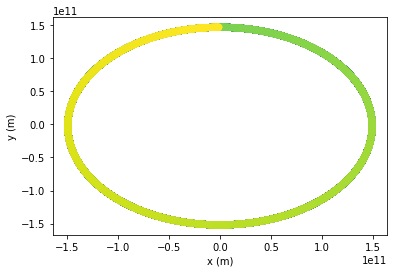

In [ ]:
N = int((end-start)/h) +1 #determine number of timesteps.

#setups the arrays we'll need
rpoints = np.zeros((N,2)) #define an array for r values.  Initially set everything to 0.  
vpoints = np.zeros((N,2)) #define an array for my r values.  Initially set everything to 0. 
tpoints = np.zeros(N) #define an array for time values.  Initially set everything to 0.
E_potential = np.zeros(N) #define an array for potential energies.  Initially set everything to 0. 
E_kinetic = np.zeros(N) #define an array for kinetic energies.  Initially set everything to 0. 

#assign initial values to all arrays based on initial conditions
rpoints[0] = r_0 #set our initial position
vpoints[0] = v_0 #set our initial velocity
tpoints[0] = start #set our initial time
E_potential[0] = E_pot(r_0) #initial potential energy
E_kinetic[0] = E_kin(v_0) #initial kinetic energy

#perform the N timesteps
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  rpoints[n+1] = rpoints[n] + vpoints[n] * h + 0.5 * accel(rpoints[n]) * h**2
  vpoints[n+1] = vpoints[n] + 0.5 * (accel(rpoints[n]) + accel(rpoints[n+1]))*h
  E_potential[n+1] = E_pot(rpoints[n+1])
  E_kinetic[n+1] = E_kin(vpoints[n+1])

#Get total energy by adding potential and kinetic energies
E_total= E_potential + E_kinetic

#Make the plot
plt.scatter(rpoints[:,0],rpoints[:,1],c=tpoints)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

##B.

The gravitational potential energy of the Earth is $-GMm/r$, where
  $m=5.9722\times10^{24}\,$kg is the mass of the planet, and its kinetic
  energy is $\frac{1}{2} mv^2$ as usual.  Modify your program to calculate both
  of these quantities at each step, along with their sum (which is the
  total energy), and make a plot showing all three as a function of time on
  the same axes.  You should find that the potential and kinetic energies
  vary visibly during the course of an orbit, but the total energy remains
  constant.

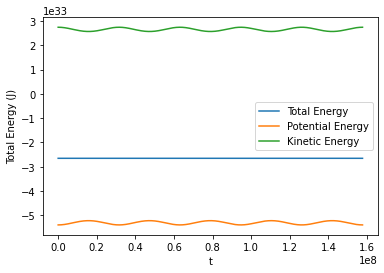

In [ ]:
plt.plot(tpoints,E_total,label="Total Energy")
plt.plot(tpoints,E_potential,label="Potential Energy")
plt.plot(tpoints,E_kinetic,label="Kinetic Energy")
plt.xlabel('t')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.show()

##C.
Now plot the total energy alone without the others and you should be
  able to see a slight variation over the course of an orbit.  Because
  you're using the Verlet method, however, which conserves energy in the
  long term, the energy should always return to its starting value at the
  end of each complete orbit.

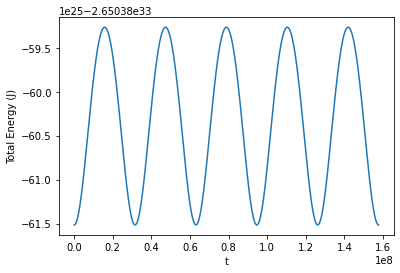

In [ ]:
plt.plot(tpoints,E_total)
plt.xlabel('t')
plt.ylabel('Total Energy (J)')
plt.show()

It looks like there are oscillations here, and there are, but they are fairly small compared to the kinetic and potential energies.

# Grading (50 points)

* 10 points: part a. Is your code well written? Is it easy to read with comments and units?
* 15 points: part a. Did you modify the acceleration function to return twp values? And did you modify the rpoints array to be of size Nx2?  Alternatively you could also implement separate x and y arrays and accel_x and accel_y functions.  Whatever you do, you need to have a method to account for 2D dynamics.
* 5 points: part a. Did you get the correct plot?
* 10 points: part b.  Does your plot show oscillations in potential and kinetic energy, but a relatively stable total energy?
* 5 points: part c.  Does your plot show (small) oscillations in the total energy?
* 5 points: parts a through c: Do your plots have proper labels, units, and legends (if needed)?